# New York City Citywide Mobility Survey 2019
# Time Series Analysis

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing data

### 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [2]:
# Define path
path = r'/Users/peimei/11-2023 New York City Citywide Mobility Survey 2019'

# Join the path using 'os.path.join'
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'Citywide_Mobility_Survey_Trips_Person_Vehicle.csv')

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path,index_col = [0],low_memory=False)

In [3]:
data.head()

,hh_id,trip_weight,home_cms_zone,survey_mode,person_id,day_num,travel_date,travel_date_dow,trip_id,trip_num,...,d_purpose_category_imputed,o_location_type_imputed,d_location_type_imputed,o_congestion,d_congestion,age,jobs_count,industry,distance_category,vehicle_num
0,19000235,0.0,Northern Bronx,smartphone app,1900023501,1,2019-05-30,Thursday,1900023501001,1,...,Work,4,2,1,0,35-44,1,Financial services,>3 miles,2.0
1,19000235,0.0,Northern Bronx,smartphone app,1900023501,3,2019-06-01,Saturday,1900023501004,4,...,Home,2,1,0,0,35-44,1,Financial services,>3 miles,2.0
2,19000235,0.0,Northern Bronx,smartphone app,1900023501,4,2019-06-02,Sunday,1900023501013,13,...,Meal,4,4,0,0,35-44,1,Financial services,>3 miles,2.0
3,19000235,0.0,Northern Bronx,smartphone app,1900023501,4,2019-06-02,Sunday,1900023501014,14,...,Meal,4,4,0,0,35-44,1,Financial services,>3 miles,2.0
4,19000235,0.0,Northern Bronx,smartphone app,1900023501,5,2019-06-03,Monday,1900023501016,16,...,Meal,4,4,0,0,35-44,1,Financial services,1-3 miles,2.0


In [4]:
data.columns

Index(['hh_id', 'trip_weight', 'home_cms_zone', 'survey_mode', 'person_id',
       'day_num', 'travel_date', 'travel_date_dow', 'trip_id', 'trip_num',
       'leg_num', 'depart_date', 'arrive_date', 'o_cms_zone', 'd_cms_zone',
       'trip_duration_min', 'trip_distance_mile', 'mode_type',
       'mode_type_detailed', 'sustainable_mode', 'mode_1', 'mode_2', 'mode_3',
       'mode_4', 'used_transit', 'transit_access', 'transit_egress',
       'high_speed_flag', 'long_distance_flag', 'invalid_purpose_flag',
       'o_purpose_imputed', 'd_purpose_imputed', 'o_purpose_category_imputed',
       'd_purpose_category_imputed', 'o_location_type_imputed',
       'd_location_type_imputed', 'o_congestion', 'd_congestion', 'age',
       'jobs_count', 'industry', 'distance_category', 'vehicle_num'],
      dtype='object')

In [5]:
sub = data[['travel_date','trip_distance_mile']]
sub

,travel_date,trip_distance_mile
0,2019-05-30,13.4
1,2019-06-01,3.7
2,2019-06-02,9.8
3,2019-06-02,11.1
4,2019-06-03,2.5
...,...,...
74918,2019-06-27,0.2
74919,2019-06-27,0.9
74920,2019-06-27,0.8
74921,2019-06-27,1.1


In [6]:
# Calculate the mean distance by travel date
sub['mean_trip_distance'] = sub.groupby('travel_date')['trip_distance_mile'].transform('mean')

In [7]:
# Remove column 'trip_distance_mile'
sub2 = sub.drop(columns = ['trip_distance_mile'])

In [8]:
sub2.head()

,travel_date,mean_trip_distance
0,2019-05-30,3.336057
1,2019-06-01,3.792977
2,2019-06-02,3.778022
3,2019-06-02,3.778022
4,2019-06-03,3.461959


In [9]:
sub3 = sub2.drop_duplicates(subset=['travel_date'])

In [10]:
sub3.shape

(40, 2)

In [11]:
sub3.head()

,travel_date,mean_trip_distance
0,2019-05-30,3.336057
1,2019-06-01,3.792977
2,2019-06-02,3.778022
4,2019-06-03,3.461959
6,2019-06-04,3.332626


In [12]:
# Set the "travel_date" column as the index

from datetime import datetime

sub3['datetime'] = pd.to_datetime(sub3['travel_date']) # Create a datetime column from "travel_date.""
sub3 = sub3.set_index('datetime') # Set the datetime as the index of the dataframe.
sub3.drop(['travel_date'], axis=1, inplace=True) # Drop the "Date" column.
sub3.head()

,mean_trip_distance
datetime,
2019-05-30,3.336057
2019-06-01,3.792977
2019-06-02,3.778022
2019-06-03,3.461959
2019-06-04,3.332626


In [13]:
# Arrange the dates in a chronological order
sub3 = sub3.sort_index()

In [14]:
type(sub3)

pandas.core.frame.DataFrame

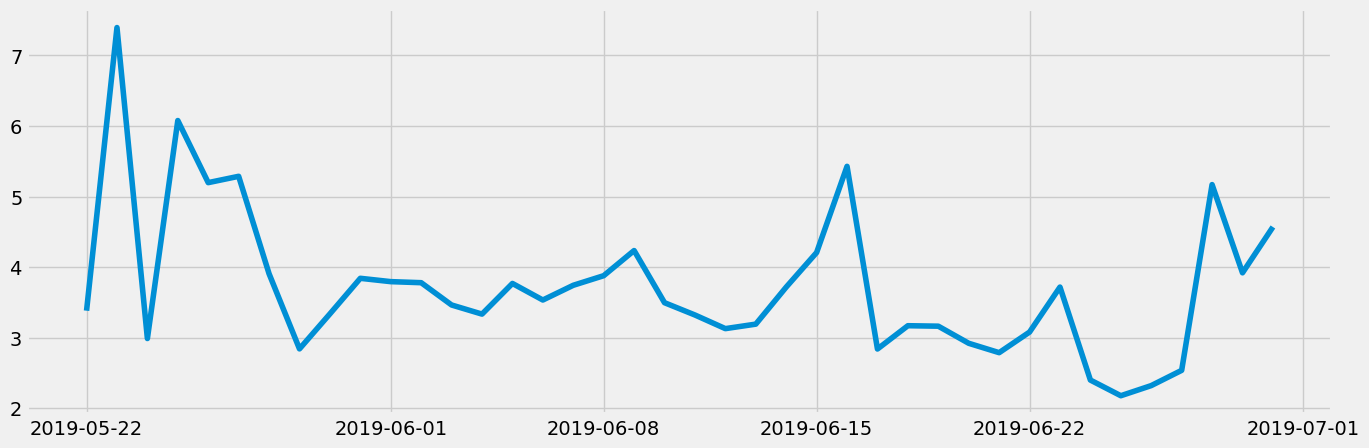

In [15]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub3)

### 2. Wrangling, and cleaning time-series data

In [16]:
# Check for missing values

sub3.isnull().sum() 

mean_trip_distance    0
dtype: int64

In [17]:
# Check for duplicates

dups = sub3.duplicated()
dups.sum()

# No dups.

0

### 3. Time-series analysis: decomposition

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sub3, model='additive')

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

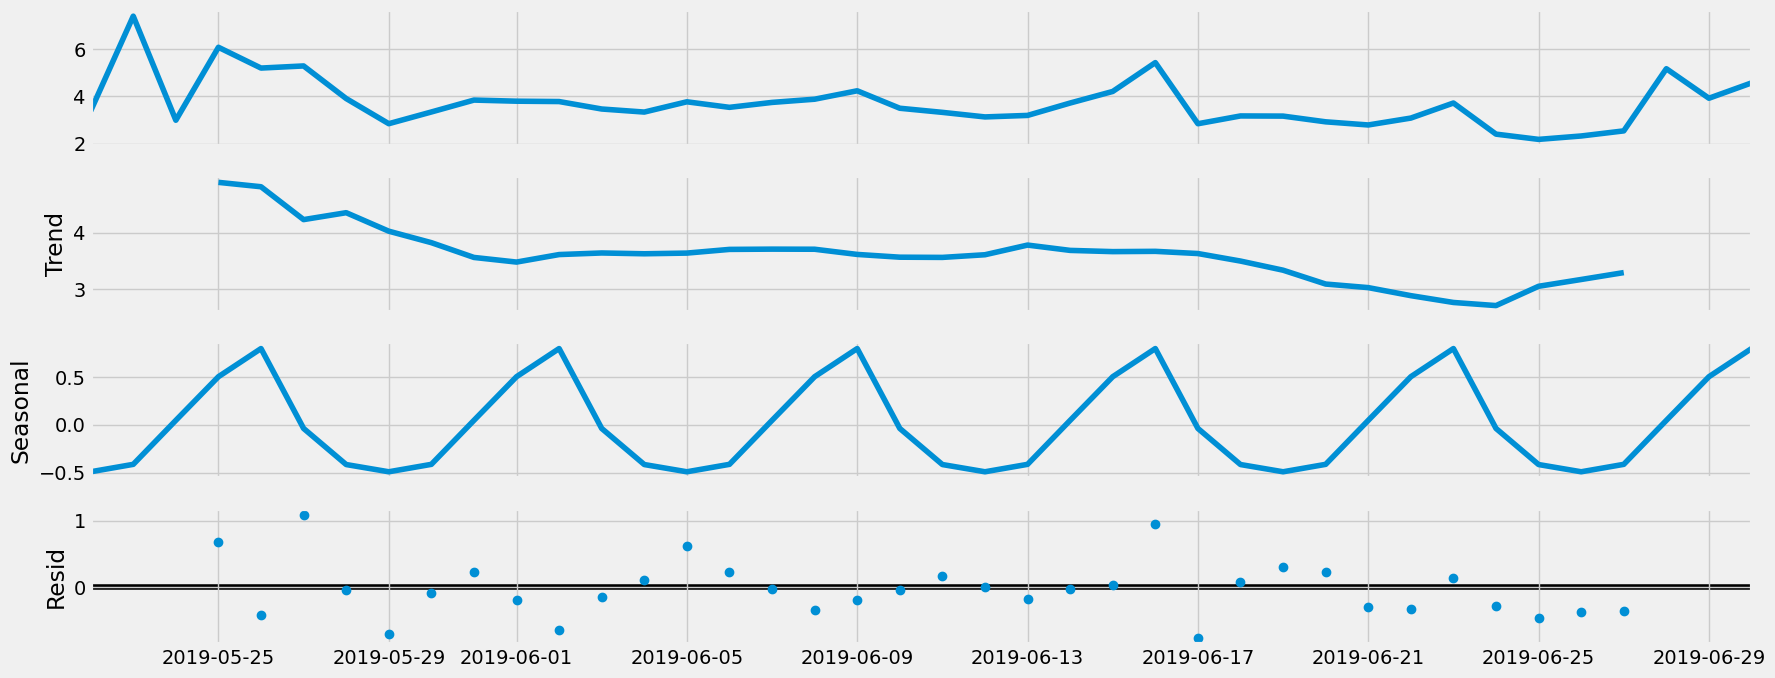

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

### Analysis:
1. There is a downward trend at the beginning. Though it climbs in the middle, it drops again at the end.
2. There is seasonality that occurs every 7 days. 
3. There is quite some noise throughout.

### 4. Testing for stationarity

In [21]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub3['mean_trip_distance'])

Dickey-Fuller Stationarity test:
Test Statistic                 -5.028617
p-value                         0.000019
Number of Lags Used             0.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


### Analysis:
* Null hypothesis is that there is a unit root (random jump) in my data. In other words, the data is non-stationary.
* The test statistic (-5.028617) is smaller than the critical values on all three significance levels. It means I can reject the null hypothesis. 
* The p-value is close to zero. It tells us that this is a significant result.
* Summing up, this means I can reject the null hypothesis and consider my series stationary. 

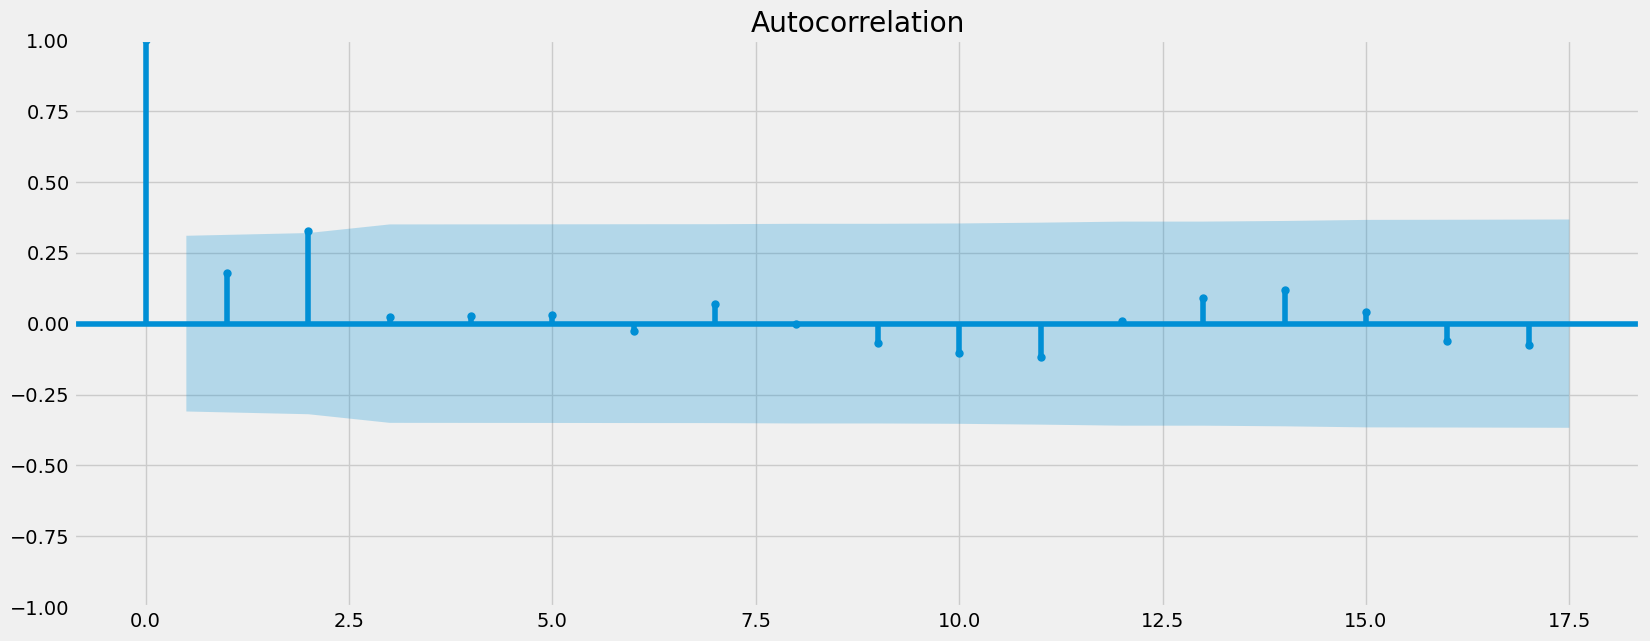

In [22]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # autocorrelation and partial correlation plots

plot_acf(sub3)
plt.show()